<a href="https://colab.research.google.com/github/pharringtonp19/presidential-policies/blob/main/notebooks/PersonalSavingsRate80s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime
from google.colab import userdata
from matplotlib import font_manager
import matplotlib.dates as mdates
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
# Define the OPEC years
start = datetime.datetime(1971, 1, 1)
end = datetime.datetime(1999, 12, 31)

# Pull Real GDP
investment = web.DataReader("PSAVERT", "fred", start, end)
investment.head()

,PSAVERT
DATE,
1971-01-01,13.3
1971-02-01,13.3
1971-03-01,13.5
1971-04-01,13.2
1971-05-01,13.6


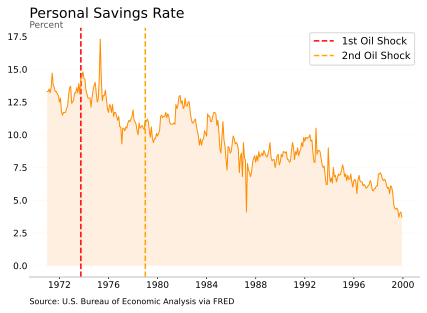

In [6]:
x, y = investment.index, investment['PSAVERT']

# --- NYT-style colors ---
line_color     = "#FF8C00"  # dark orange (main line)
fill_color     = "#FFE5CC"  # pale peach fill
forecast_fill  = "#FFB84D"  # medium orange for forecast shading
grid_color     = "#FFF5EB"  # very light orange-gray for grid


fig, ax = plt.subplots(figsize=(7, 4.5), dpi=300)
ax.set_facecolor("white")
fig.patch.set_facecolor("white")

# area + line
ax.fill_between(x, 0, y, color=fill_color, linewidth=0, zorder=1, alpha=0.6)
ax.yaxis.grid(True, color=grid_color, linewidth=.5, zorder=2)
ax.plot(x, y, color=line_color, linewidth=1, zorder=3,
        solid_capstyle="round", solid_joinstyle="round")

# spines & ticks (keep only a subtle bottom spine)
for side in ("top", "left", "right"):
    ax.spines[side].set_visible(False)
ax.spines["bottom"].set_color("#bdbdbd")
ax.spines["bottom"].set_linewidth(1)

ax.tick_params(axis="x", length=2, labelsize=9, pad=2)
ax.tick_params(axis="y", length=0, labelsize=9, pad=2)

# tidy limits
ax.set_axisbelow(True)            # any future gridlines stay behind

# title + subtitle (left-aligned)
ax.text(0., 1.04, s='Personal Savings Rate', transform=ax.transAxes, size=14)
ax.text(0, 1.00, "Percent", transform=ax.transAxes,
        fontsize=9, color="#555555")

ax.annotate("Source: U.S. Bureau of Economic Analysis via FRED",
        xy = (0., -0.1),
        xycoords='axes fraction',
        ha='left',
        va="center",
        fontsize=8)

plt.axvline(datetime.datetime(1973, 10, 1), color='red', linestyle='--', label='1st Oil Shock')
plt.axvline(datetime.datetime(1979, 1, 1), color='orange', linestyle='--', label='2nd Oil Shock')
plt.legend(loc='upper right')

fig.savefig("personal_savings_rate.png", bbox_inches="tight", dpi=300)
plt.show()